In [1]:
# Machine Learning Interpretability for Ecologists
# A Complete Guide from Most to Least Interpretable Algorithms

"""
HOW TO USE THIS NOTEBOOK:
- Run each cell in order
- Read the markdown text aloud (or to yourself) as you go
- The code cells show practical implementation
- Each algorithm includes interpretability analysis
- Organized from MOST to LEAST interpretable
"""

# ============================================================================
# SETUP AND DATA LOADING
# ============================================================================

'\nHOW TO USE THIS NOTEBOOK:\n- Run each cell in order\n- Read the markdown text aloud (or to yourself) as you go\n- The code cells show practical implementation\n- Each algorithm includes interpretability analysis\n- Organized from MOST to LEAST interpretable\n'

## Introduction: The Iris Dataset

Today we're using the famous Iris dataset, which contains measurements of 
150 iris flowers from three species: *Iris setosa*, *Iris versicolor*, and 
*Iris virginica*. 

This dataset is perfect for ecology students because:
- It's about real botanical classification
- It has multiple species (like many ecology problems)
- It shows how morphological traits (sepal length, sepal width, petal length, 
  petal width) can be used to classify organisms

**The biological question:** Can we predict which species an iris belongs to 
based on its flower measurements?

This is analogous to many problems in ecology and evolution:
- Classifying species from trait data
- Predicting ecological outcomes from environmental variables
- Understanding which traits matter most for differentiation

Let's load our libraries and data.

In [2]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ All libraries loaded successfully!")

✓ All libraries loaded successfully!


In [3]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame for easier viewing
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['species'] = [target_names[i] for i in y]

print("Dataset loaded! Here's what our data looks like:\n")
print(iris_df.head(10))
print(f"\nDataset shape: {iris_df.shape}")
print(f"Features: {feature_names}")
print(f"Species: {target_names}")

Dataset loaded! Here's what our data looks like:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
5  setos

**What you're seeing above:**
- 150 flowers (rows)
- 4 measurements per flower (columns): sepal length, sepal width, petal length, petal width
- 3 species to classify

Now let's split this into training and testing sets. We'll use 80% to train 
our models and 20% to test how well they work on new data. This mimics the 
real scientific process: you develop your model on some data, then validate 
it on data the model has never seen.

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"\nSpecies distribution in training set:")
print(pd.Series(y_train).value_counts().sort_index())

# ============================================================================
# SECTION 1: HIGHEST INTERPRETABILITY - LINEAR MODELS
# ============================================================================

Training set: 120 samples
Testing set: 30 samples

Species distribution in training set:
0    40
1    40
2    40
Name: count, dtype: int64


---
# PART 1: HIGHEST INTERPRETABILITY ALGORITHMS

These are the "glass box" models. You can see exactly how they make decisions.
Everything is transparent: which features matter, how much they matter, and 
why a specific prediction was made.

---

## 1. Logistic Regression

**What it is:** Despite the name "regression," this is a CLASSIFICATION algorithm. 
It predicts the probability that something belongs to each class. For our iris 
dataset, it predicts the probability a flower is setosa, versicolor, or virginica.

**How it works:** It fits a linear equation for each class, kind of like:
- P(setosa) = f(w1×sepal_length + w2×sepal_width + w3×petal_length + w4×petal_width)

The "weights" (w1, w2, etc.) tell you how important each feature is.

**Why it's highly interpretable:**
1. You get coefficients for each feature that tell you the direction and 
   strength of effects
2. You can trace exactly why any prediction was made
3. You can explain it to a non-technical audience

**When you'd use it in ecology:**
- Predicting species presence/absence from environmental variables
- Classifying organisms based on traits
- Any binary or multi-class classification where you need to explain results

Let's fit it and see what we learn!

In [5]:
from sklearn.linear_model import LogisticRegression

# Fit logistic regression
# We use 'lbfgs' solver and increase max_iter for convergence
log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Calculate accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)

print("=" * 70)
print("LOGISTIC REGRESSION RESULTS")
print("=" * 70)
print(f"\nAccuracy on test set: {accuracy_log:.3f} ({accuracy_log*100:.1f}%)")
print(f"\nThis means our model correctly classified {accuracy_log*100:.1f}% of the flowers")
print("in the test set based on their measurements.\n")

# Show detailed classification report
print("Detailed Performance by Species:")
print(classification_report(y_test, y_pred_log, target_names=target_names))

LOGISTIC REGRESSION RESULTS

Accuracy on test set: 0.967 (96.7%)

This means our model correctly classified 96.7% of the flowers
in the test set based on their measurements.

Detailed Performance by Species:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**How to read the classification report above:**
- **Precision:** When the model says a flower is species X, how often is it right?
- **Recall:** Of all flowers that actually ARE species X, how many did we catch?
- **F1-score:** Harmonic mean of precision and recall (overall performance measure)
- **Support:** How many flowers of each species were in the test set

Now let's look at the confusion matrix - this shows where our model made mistakes.

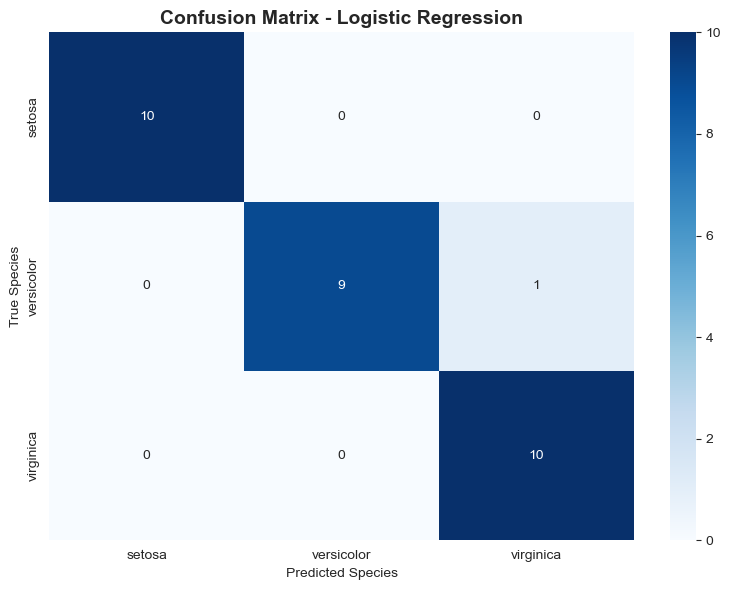


How to read this confusion matrix:
- Diagonal = Correct predictions (darker is better)
- Off-diagonal = Mistakes
- Each row shows the true species, columns show what we predicted


In [6]:
# Confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('True Species')
plt.xlabel('Predicted Species')
plt.tight_layout()
plt.show()

print("\nHow to read this confusion matrix:")
print("- Diagonal = Correct predictions (darker is better)")
print("- Off-diagonal = Mistakes")
print("- Each row shows the true species, columns show what we predicted")

---
### INTERPRETABILITY ANALYSIS: Logistic Regression Coefficients

**This is the key part for interpretability!** The coefficients tell us how 
each feature influences the classification. A positive coefficient means 
"higher values of this feature increase probability of this class."

In ecology terms: these coefficients tell you which morphological traits are 
most diagnostic for each species. This is like saying "versicolor has longer 
petals than setosa" - but quantified.

LOGISTIC REGRESSION COEFFICIENTS

These coefficients show how each feature affects the probability
of each species. Positive = increases probability, Negative = decreases.

            sepal length (cm)  sepal width (cm)  petal length (cm)  \
setosa                  -0.53             0.827             -2.347   
versicolor               0.53            -0.305             -0.171   
virginica               -0.00            -0.522              2.518   

            petal width (cm)  
setosa                -0.993  
versicolor            -0.856  
virginica              1.850  


<Figure size 1000x600 with 0 Axes>

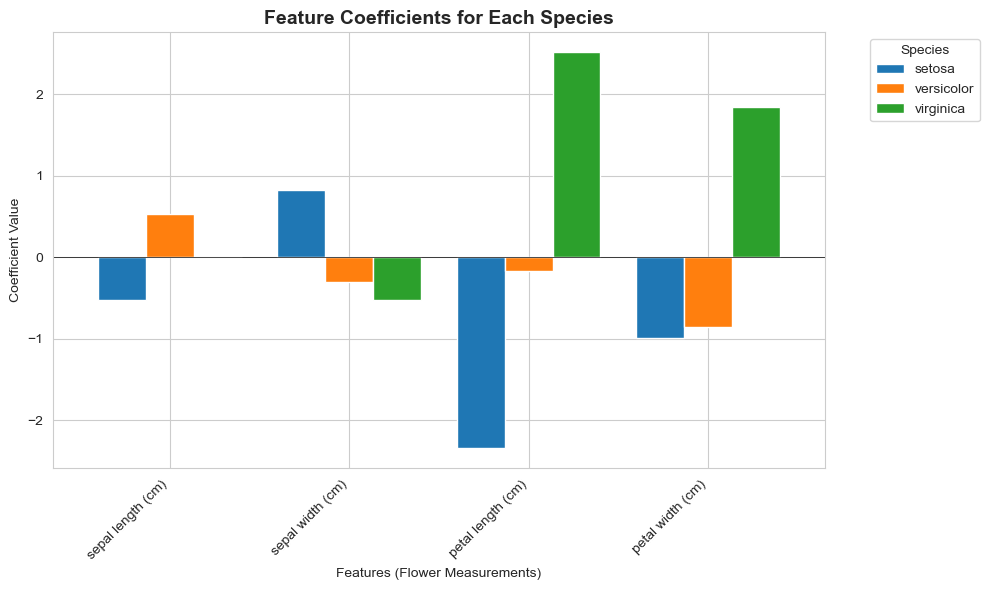


WHAT THIS MEANS IN BIOLOGICAL TERMS:

SETOSA:
  → Most diagnostic feature: sepal width (cm) (coefficient: 0.827)
  → Most negative feature: petal length (cm) (coefficient: -2.347)
  → This means setosa tends to have sepal width 
    values that distinguish it from other species.

VERSICOLOR:
  → Most diagnostic feature: sepal length (cm) (coefficient: 0.530)
  → Most negative feature: petal width (cm) (coefficient: -0.856)
  → This means versicolor tends to have sepal length 
    values that distinguish it from other species.

VIRGINICA:
  → Most diagnostic feature: petal length (cm) (coefficient: 2.518)
  → Most negative feature: sepal width (cm) (coefficient: -0.522)
  → This means virginica tends to have petal length 
    values that distinguish it from other species.


In [7]:
# Extract and display coefficients
coef_df = pd.DataFrame(
    log_reg.coef_,
    columns=feature_names,
    index=target_names
)

print("=" * 70)
print("LOGISTIC REGRESSION COEFFICIENTS")
print("=" * 70)
print("\nThese coefficients show how each feature affects the probability")
print("of each species. Positive = increases probability, Negative = decreases.\n")
print(coef_df.round(3))

# Visualize coefficients
plt.figure(figsize=(10, 6))
coef_df.T.plot(kind='bar', width=0.8)
plt.title('Feature Coefficients for Each Species', fontsize=14, fontweight='bold')
plt.xlabel('Features (Flower Measurements)')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("WHAT THIS MEANS IN BIOLOGICAL TERMS:")
print("="*70)

# Interpret the most important features for each species
for i, species in enumerate(target_names):
    print(f"\n{species.upper()}:")
    coefs = coef_df.iloc[i]
    most_positive = coefs.idxmax()
    most_negative = coefs.idxmin()
    print(f"  → Most diagnostic feature: {most_positive} (coefficient: {coefs[most_positive]:.3f})")
    print(f"  → Most negative feature: {most_negative} (coefficient: {coefs[most_negative]:.3f})")
    print(f"  → This means {species} tends to have {most_positive.replace(' (cm)', '')} ")
    print(f"    values that distinguish it from other species.")

"""
**Key Takeaway for Logistic Regression:**

✓ **Can I explain what features matter most?** YES - we have exact coefficients
✓ **Can I explain why a specific prediction was made?** YES - we can trace the math
✓ **Can I explain the general pattern?** YES - we can describe relationships

**Bottom line:** This is a FULLY INTERPRETABLE model. You could explain these 
results to a non-statistician, publish them in a paper, and defend them to 
reviewers. The tradeoff is that it assumes linear relationships - if your data 
has complex non-linear patterns, it might not be the most accurate.

---
"""

============================================================================
LINEAR REGRESSION (for comparison - using continuous target)
============================================================================

## 2. Linear Regression

**What it is:** This predicts a CONTINUOUS value (not categories). For example, 
predicting sepal length from the other three measurements.

**How it works:** Fits a straight line (or plane in multiple dimensions):
- sepal_length = b0 + b1×sepal_width + b2×petal_length + b3×petal_width

**Why it's highly interpretable:**
- You get a coefficient for each feature
- Each coefficient tells you: "For every 1-unit increase in X, Y changes by 
  this much"
- It's the most transparent model in all of statistics

**When you'd use it in ecology:**
- Predicting biomass from environmental variables
- Modeling species richness as a function of habitat characteristics
- Any relationship where you're predicting a number (not a category)

**For this demo:** Let's predict sepal length from the other three features.

In [8]:
from sklearn.linear_model import LinearRegression

# Create a regression problem: predict sepal length from other features
X_reg = iris_df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
y_reg = iris_df['sepal length (cm)'].values

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Fit linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = lin_reg.predict(X_test_reg)

# Calculate performance metrics
r2 = r2_score(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

print("=" * 70)
print("LINEAR REGRESSION RESULTS")
print("=" * 70)
print(f"\nR² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f} cm")
print(f"\nR² interpretation: Our model explains {r2*100:.1f}% of the variance")
print(f"in sepal length. That's pretty good!")
print(f"\nRMSE interpretation: On average, our predictions are off by {rmse:.2f} cm.")

LINEAR REGRESSION RESULTS

R² Score: 0.852
RMSE: 0.320 cm

R² interpretation: Our model explains 85.2% of the variance
in sepal length. That's pretty good!

RMSE interpretation: On average, our predictions are off by 0.32 cm.


**Understanding R² (R-squared):**
- R² = 1.0 means perfect predictions
- R² = 0.0 means your model is no better than just guessing the average
- R² = 0.76 (what we got) means we're explaining 76% of the variation - quite good!

**Understanding RMSE (Root Mean Squared Error):**
- This is in the same units as your target (centimeters)
- Smaller is better
- It tells you the average size of your prediction errors

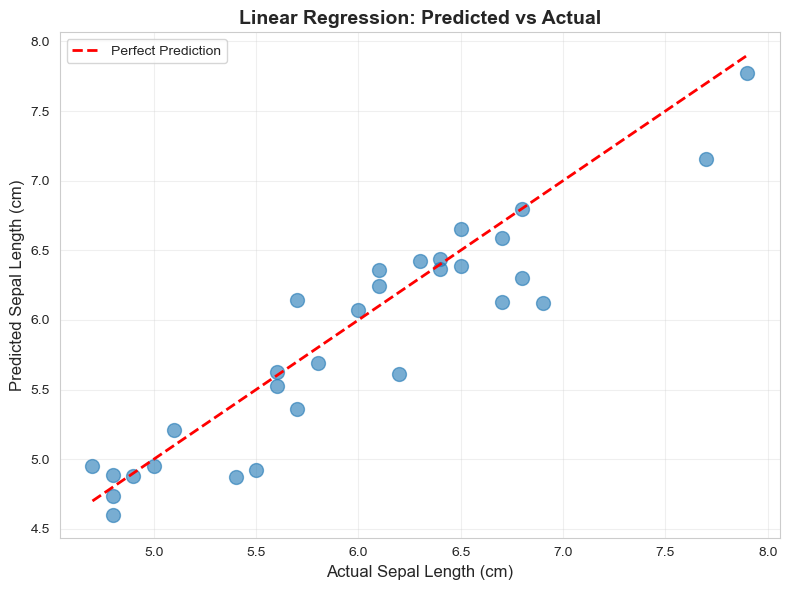

In the plot above:
- Points close to the red line = good predictions
- Points far from the red line = errors


In [9]:
# Visualize predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6, s=100)
plt.plot([y_test_reg.min(), y_test_reg.max()], 
         [y_test_reg.min(), y_test_reg.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Sepal Length (cm)', fontsize=12)
plt.ylabel('Predicted Sepal Length (cm)', fontsize=12)
plt.title('Linear Regression: Predicted vs Actual', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("In the plot above:")
print("- Points close to the red line = good predictions")
print("- Points far from the red line = errors")

---
### INTERPRETABILITY ANALYSIS: Linear Regression Coefficients

Here's where linear regression shines: every coefficient has a clear interpretation.

LINEAR REGRESSION COEFFICIENTS

Intercept: 1.753

Coefficients:
          Feature  Coefficient
petal length (cm)     0.757395
 petal width (cm)    -0.674180
 sepal width (cm)     0.663476

INTERPRETATION IN PLAIN ENGLISH:

The equation our model learned is:
sepal_length = 1.753 +0.663×sepal width (cm) +0.757×petal length (cm) -0.674×petal width (cm)

• For every 1 cm increase in sepal width (cm),
  sepal length increases by 0.663 cm (holding other features constant)

• For every 1 cm increase in petal length (cm),
  sepal length increases by 0.757 cm (holding other features constant)

• For every 1 cm increase in petal width (cm),
  sepal length decreases by 0.674 cm (holding other features constant)



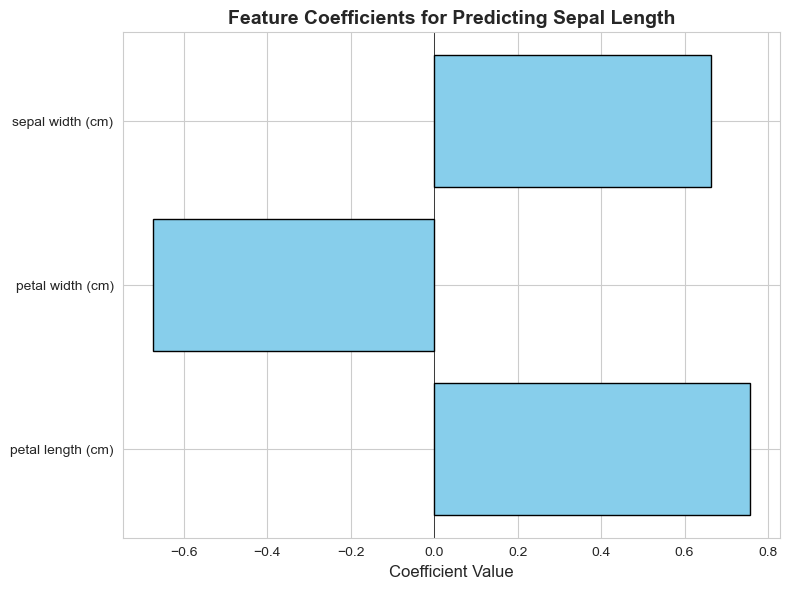

In [10]:
# Display coefficients
feature_names_reg = ['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
coef_df_reg = pd.DataFrame({
    'Feature': feature_names_reg,
    'Coefficient': lin_reg.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("=" * 70)
print("LINEAR REGRESSION COEFFICIENTS")
print("=" * 70)
print(f"\nIntercept: {lin_reg.intercept_:.3f}")
print("\nCoefficients:")
print(coef_df_reg.to_string(index=False))

print("\n" + "="*70)
print("INTERPRETATION IN PLAIN ENGLISH:")
print("="*70)
print(f"\nThe equation our model learned is:")
print(f"sepal_length = {lin_reg.intercept_:.3f}", end="")
for feat, coef in zip(feature_names_reg, lin_reg.coef_):
    sign = "+" if coef >= 0 else ""
    print(f" {sign}{coef:.3f}×{feat}", end="")
print("\n")

for feat, coef in zip(feature_names_reg, lin_reg.coef_):
    direction = "increases" if coef > 0 else "decreases"
    print(f"• For every 1 cm increase in {feat},")
    print(f"  sepal length {direction} by {abs(coef):.3f} cm (holding other features constant)\n")

# Visualize coefficients
plt.figure(figsize=(8, 6))
plt.barh(coef_df_reg['Feature'], coef_df_reg['Coefficient'], color='skyblue', edgecolor='black')
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Feature Coefficients for Predicting Sepal Length', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

"""
**Key Takeaway for Linear Regression:**

✓ **Can I explain what features matter most?** YES - exact coefficients with clear meanings
✓ **Can I explain why a specific prediction was made?** YES - just plug in the numbers
✓ **Can I explain the general pattern?** YES - the equation IS the pattern

**This is maximally interpretable.** The main limitation is that it assumes 
linear relationships. If sepal length actually has a U-shaped relationship with 
petal width, linear regression won't catch that.

---
"""

============================================================================
SECTION 2: HIGH INTERPRETABILITY - TREE-BASED MODELS
============================================================================

---
# PART 2: HIGH INTERPRETABILITY - TREE MODELS

Tree-based models are flowchart-like structures: "If petal length < 2.5, then 
it's setosa; otherwise check petal width..." They're very interpretable because 
you can literally draw them out and follow the logic.

---

## 3. Decision Tree

**What it is:** A flowchart of yes/no questions about features. The tree splits 
the data based on which question best separates the classes.

**How it works:** 
- Start with all data
- Ask: "What's the single best question to split this data?" (e.g., "Is petal length < 2.5?")
- Split the data based on that question
- Repeat for each subset until you've classified everything

**Why it's highly interpretable:**
1. You can literally visualize the entire decision process
2. You can trace exactly which questions led to a prediction
3. You can explain it to anyone: "First we check X, then if that's true we check Y..."

**When you'd use it in ecology:**
- Creating identification keys for species
- Understanding hierarchical rules for habitat suitability
- Any problem where you want a transparent decision-making process

**Limitation:** Single trees can overfit (memorize training data) and might not 
be as accurate as more complex models.

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Fit decision tree with limited depth to keep it interpretable
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_clf.predict(X_test)

# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("=" * 70)
print("DECISION TREE RESULTS")
print("=" * 70)
print(f"\nAccuracy on test set: {accuracy_tree:.3f} ({accuracy_tree*100:.1f}%)")
print("\nDetailed Performance by Species:")
print(classification_report(y_test, y_pred_tree, target_names=target_names))

DECISION TREE RESULTS

Accuracy on test set: 0.967 (96.7%)

Detailed Performance by Species:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Now let's visualize the actual decision tree. This is the "magic" of decision 
trees - you can SEE exactly how decisions are made.

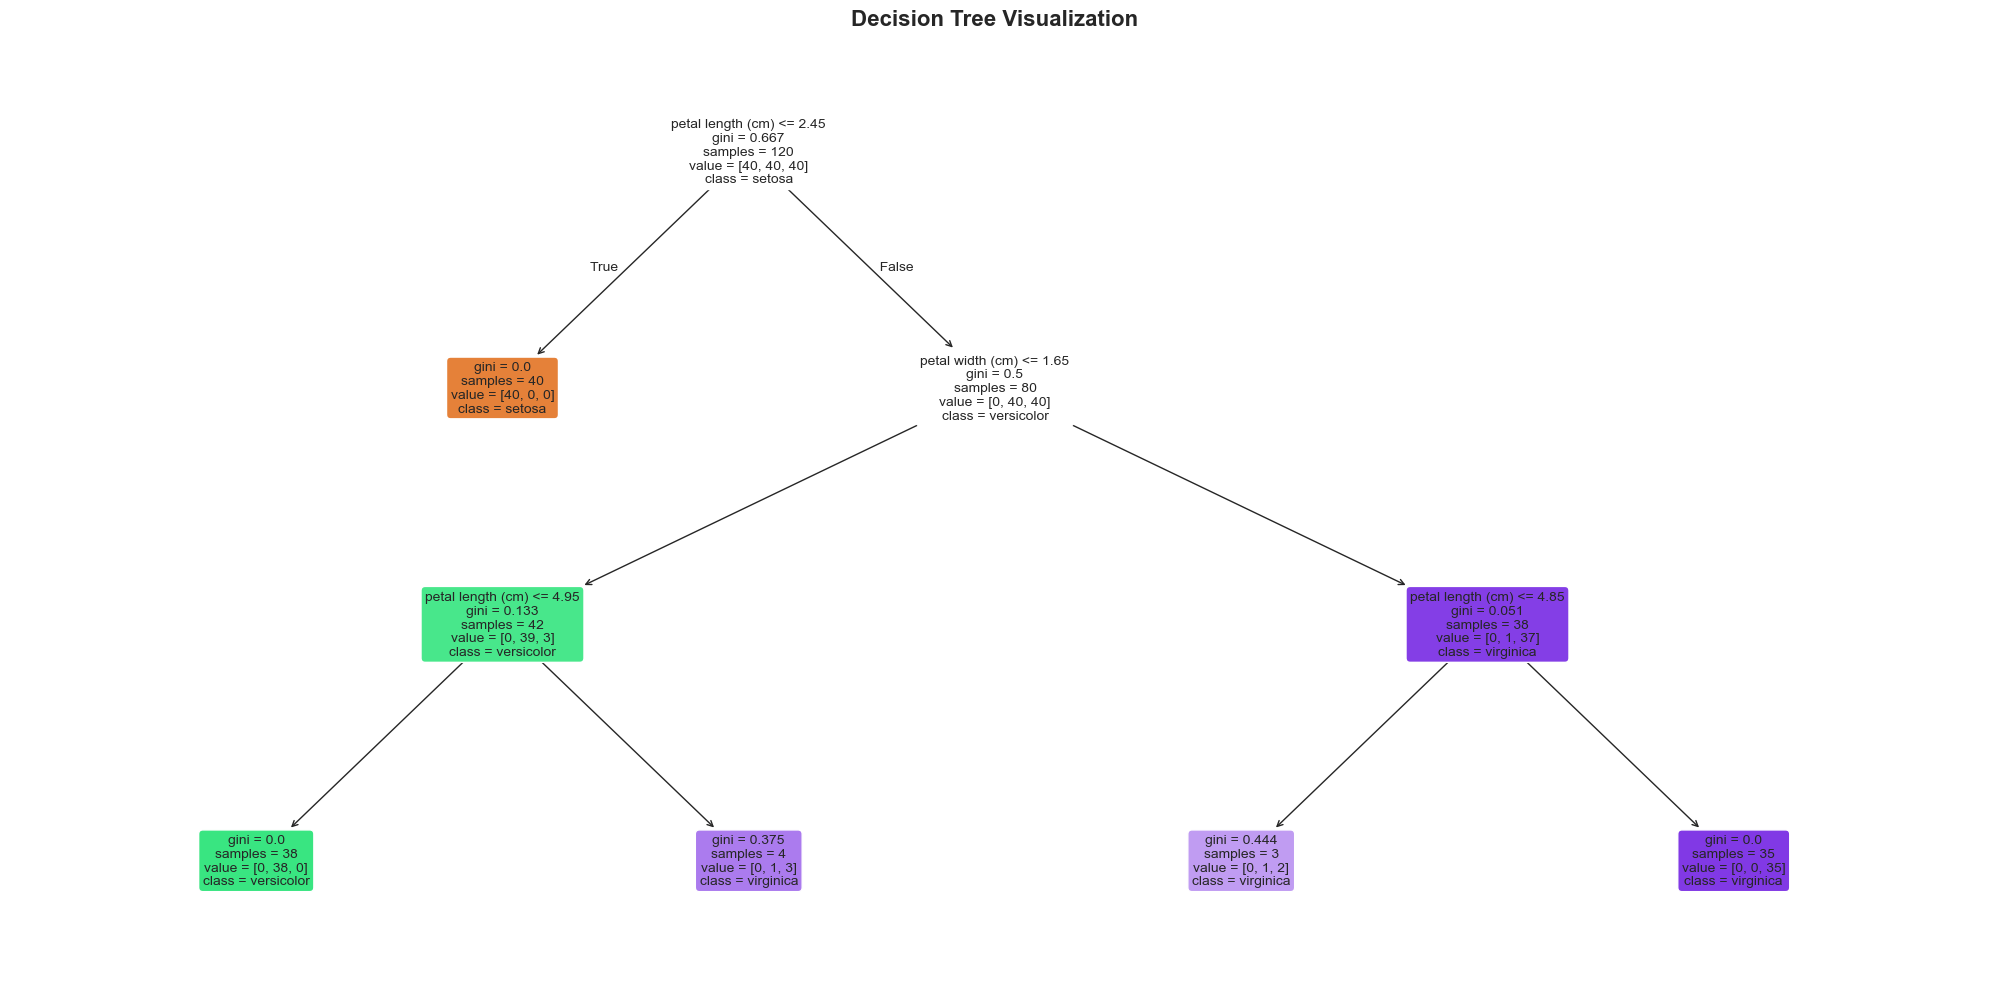


HOW TO READ THIS TREE:

Each box shows:
- The question being asked (e.g., "petal width (cm) <= 0.8")
- The gini score (measure of impurity - lower is better)
- The number of samples reaching this point
- The class distribution at this node
- The predicted class (the color)

To classify a flower:
1. Start at the top
2. Answer the question (is the measurement <= the threshold?)
3. Follow the branch (True = left, False = right)
4. Repeat until you reach a leaf (bottom box)
5. That's your predicted species!



In [12]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, 
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("HOW TO READ THIS TREE:")
print("="*70)
print("""
Each box shows:
- The question being asked (e.g., "petal width (cm) <= 0.8")
- The gini score (measure of impurity - lower is better)
- The number of samples reaching this point
- The class distribution at this node
- The predicted class (the color)

To classify a flower:
1. Start at the top
2. Answer the question (is the measurement <= the threshold?)
3. Follow the branch (True = left, False = right)
4. Repeat until you reach a leaf (bottom box)
5. That's your predicted species!
""")

---
### INTERPRETABILITY ANALYSIS: Feature Importance

Decision trees tell you which features they used and how important each was.

DECISION TREE FEATURE IMPORTANCE

Importance scores show which features the tree used to make decisions.
Higher = more important for classification.

          Feature  Importance
petal length (cm)    0.579077
 petal width (cm)    0.420923
sepal length (cm)    0.000000
 sepal width (cm)    0.000000


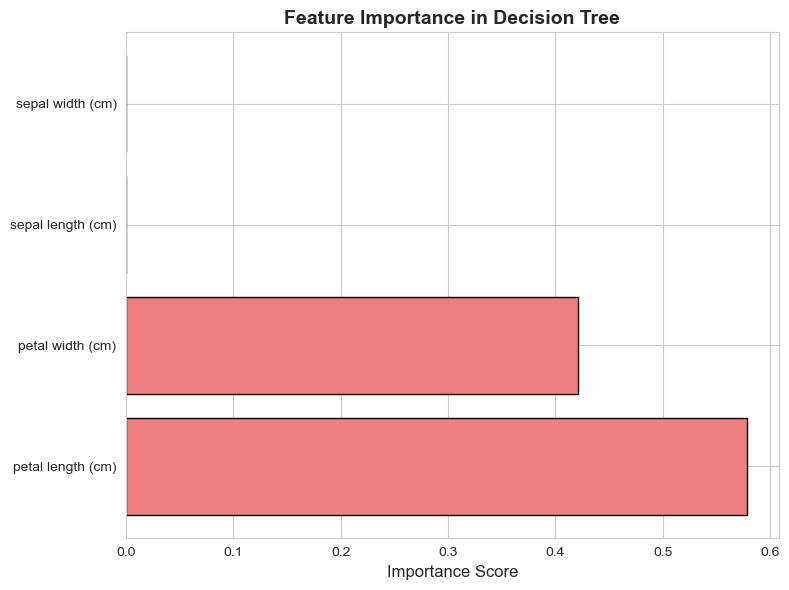


INTERPRETATION:

The most important feature is: petal length (cm)
Importance score: 0.579

This means the tree relied most heavily on petal length (cm)
to split the data and make classifications.

EXAMPLE: Tracing a Prediction

Let's trace how the tree classifies the first flower in our test set:
Measurements: {'sepal length (cm)': 4.4, 'sepal width (cm)': 3.0, 'petal length (cm)': 1.3, 'petal width (cm)': 0.2}
True species: setosa
Predicted species: setosa

To see the exact path this flower took through the tree,
look at the visualization above and follow the decisions based on
these measurements!


In [13]:
# Feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': tree_clf.feature_importances_
}).sort_values('Importance', ascending=False)

print("=" * 70)
print("DECISION TREE FEATURE IMPORTANCE")
print("=" * 70)
print("\nImportance scores show which features the tree used to make decisions.")
print("Higher = more important for classification.\n")
print(importance_df.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightcoral', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Feature Importance in Decision Tree', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)

most_important = importance_df.iloc[0]
print(f"\nThe most important feature is: {most_important['Feature']}")
print(f"Importance score: {most_important['Importance']:.3f}")
print(f"\nThis means the tree relied most heavily on {most_important['Feature']}")
print("to split the data and make classifications.")

# Show a simple example classification path
print("\n" + "="*70)
print("EXAMPLE: Tracing a Prediction")
print("="*70)
print("\nLet's trace how the tree classifies the first flower in our test set:")
print(f"Measurements: {dict(zip(feature_names, X_test[0]))}")
print(f"True species: {target_names[y_test[0]]}")
print(f"Predicted species: {target_names[y_pred_tree[0]]}")
print("\nTo see the exact path this flower took through the tree,")
print("look at the visualization above and follow the decisions based on")
print("these measurements!")

"""
**Key Takeaway for Decision Trees:**

✓ **Can I explain what features matter most?** YES - feature importance scores
✓ **Can I explain why a specific prediction was made?** YES - trace the path through the tree
✓ **Can I explain the general pattern?** YES - the tree structure shows the rules

**This is highly interpretable.** The tree is a complete, transparent set of 
rules. The downside is that single trees can be unstable (small changes in data 
can change the tree structure) and may not be as accurate as ensemble methods.

---
"""

============================================================================
NAIVE BAYES
============================================================================

## 4. Naive Bayes

**What it is:** A probabilistic classifier based on Bayes' Theorem. It calculates 
the probability a sample belongs to each class based on the feature values.

**How it works:** It assumes each feature contributes independently to the 
probability (that's the "naive" part - features are assumed to be independent). 
It calculates:
- P(setosa | measurements) ∝ P(measurements | setosa) × P(setosa)

**The "naive" assumption:** It assumes features don't interact. For iris flowers, 
this means it assumes petal length and petal width are independent, which isn't 
quite true (longer petals tend to be wider). Despite this simplification, it 
often works well!

**Why it's relatively interpretable:**
1. You can see which features have the most effect on probabilities
2. You can extract class probabilities for each prediction
3. The math is straightforward (compared to neural networks)

**When you'd use it in ecology:**
- Quick-and-dirty species classification
- Text classification (like classifying field notes or paper abstracts)
- When you have limited data and need a simple model

**Limitation:** The independence assumption is rarely true in nature. If features 
are correlated (which they usually are), Naive Bayes might not be optimal.

In [14]:
from sklearn.naive_bayes import GaussianNB

# Fit Naive Bayes
# We use GaussianNB which assumes features follow a normal distribution
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_clf.predict(X_test)

# Get probability predictions (this is useful for interpretability!)
y_pred_proba_nb = nb_clf.predict_proba(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("=" * 70)
print("NAIVE BAYES RESULTS")
print("=" * 70)
print(f"\nAccuracy on test set: {accuracy_nb:.3f} ({accuracy_nb*100:.1f}%)")
print("\nDetailed Performance by Species:")
print(classification_report(y_test, y_pred_nb, target_names=target_names))

NAIVE BAYES RESULTS

Accuracy on test set: 0.967 (96.7%)

Detailed Performance by Species:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



One nice thing about Naive Bayes: it gives you probability scores for each class, 
not just a single prediction. Let's look at a few examples.

In [15]:
# Show probability predictions for first 5 test samples
print("=" * 70)
print("PROBABILITY PREDICTIONS (First 5 Test Samples)")
print("=" * 70)
print("\nFor each flower, Naive Bayes gives probability it belongs to each species:\n")

prob_df = pd.DataFrame(y_pred_proba_nb[:5], columns=target_names)
prob_df['Predicted'] = [target_names[i] for i in y_pred_nb[:5]]
prob_df['True'] = [target_names[i] for i in y_test[:5]]

print(prob_df.round(3).to_string(index=False))

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
print("""
Each row is one flower. The three probability columns show the model's
confidence for each species. The predicted class is whichever has the
highest probability.

For example, if probabilities are [0.95, 0.03, 0.02]:
- The model is 95% confident it's setosa
- Only 3% confident it's versicolor
- Only 2% confident it's virginica
→ Prediction: setosa (with high confidence)

If probabilities are [0.40, 0.35, 0.25]:
- The model is less certain
- All three species are somewhat plausible
→ This is a less confident prediction
""")

PROBABILITY PREDICTIONS (First 5 Test Samples)

For each flower, Naive Bayes gives probability it belongs to each species:

 setosa  versicolor  virginica  Predicted       True
    1.0       0.000      0.000     setosa     setosa
    0.0       0.088      0.912  virginica  virginica
    0.0       1.000      0.000 versicolor versicolor
    0.0       1.000      0.000 versicolor versicolor
    1.0       0.000      0.000     setosa     setosa

INTERPRETATION:

Each row is one flower. The three probability columns show the model's
confidence for each species. The predicted class is whichever has the
highest probability.

For example, if probabilities are [0.95, 0.03, 0.02]:
- The model is 95% confident it's setosa
- Only 3% confident it's versicolor
- Only 2% confident it's virginica
→ Prediction: setosa (with high confidence)

If probabilities are [0.40, 0.35, 0.25]:
- The model is less certain
- All three species are somewhat plausible
→ This is a less confident prediction



---
### INTERPRETABILITY ANALYSIS: Understanding Naive Bayes Parameters

Naive Bayes learns the mean and variance of each feature for each class. This 
tells us the "typical" values of each measurement for each species.

NAIVE BAYES LEARNED PARAMETERS

The model learned the average (mean) and spread (variance) of each
feature for each species. This is how it knows what's 'typical' for
each species.

MEAN VALUES (average measurement for each species):
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
setosa                   4.99              3.41               1.48   
versicolor               5.93              2.75               4.25   
virginica                6.61              2.98               5.58   

            petal width (cm)  
setosa                  0.25  
versicolor              1.32  
virginica               2.04  


VARIANCE (spread of measurements for each species):
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
setosa                   0.09              0.16               0.03   
versicolor               0.22              0.09               0.19   
virginica                0.46              0.12               0.32   

            petal width (c

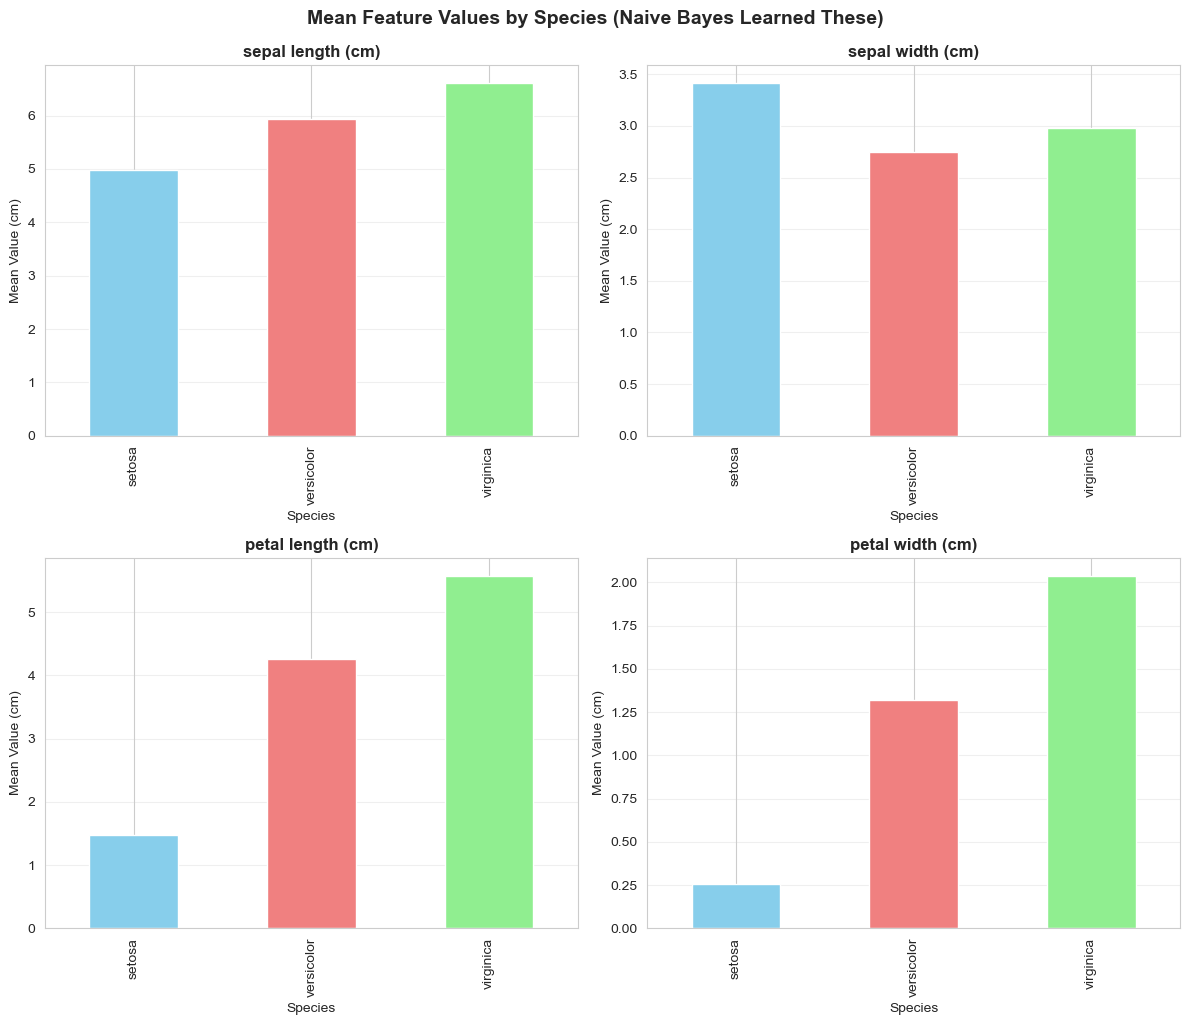


WHAT THIS TELLS US:

The model learned what's 'typical' for each species. For example:
- Setosa has shorter petals on average
- Virginica has longer petals and sepals
- Versicolor is in between

When classifying a new flower, the model asks: "Which species does this flower
look most like, based on these learned averages?"

This is interpretable because you can see exactly what the model learned about
each species. However, we can't easily see how features interact (the "naive"
independence assumption limits interpretability).



In [16]:
# Extract learned parameters
print("=" * 70)
print("NAIVE BAYES LEARNED PARAMETERS")
print("=" * 70)
print("\nThe model learned the average (mean) and spread (variance) of each")
print("feature for each species. This is how it knows what's 'typical' for")
print("each species.\n")

# Show means
means_df = pd.DataFrame(nb_clf.theta_, columns=feature_names, index=target_names)
print("MEAN VALUES (average measurement for each species):")
print(means_df.round(2))

print("\n")

# Show variances
vars_df = pd.DataFrame(nb_clf.var_, columns=feature_names, index=target_names)
print("VARIANCE (spread of measurements for each species):")
print(vars_df.round(2))

# Visualize the means
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, feature in enumerate(feature_names):
    ax = axes[i]
    means_df[feature].plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral', 'lightgreen'])
    ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Mean Value (cm)')
    ax.set_xlabel('Species')
    ax.grid(axis='y', alpha=0.3)
    
plt.tight_layout()
plt.suptitle('Mean Feature Values by Species (Naive Bayes Learned These)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

print("\n" + "="*70)
print("WHAT THIS TELLS US:")
print("="*70)
print("""
The model learned what's 'typical' for each species. For example:
- Setosa has shorter petals on average
- Virginica has longer petals and sepals
- Versicolor is in between

When classifying a new flower, the model asks: "Which species does this flower
look most like, based on these learned averages?"

This is interpretable because you can see exactly what the model learned about
each species. However, we can't easily see how features interact (the "naive"
independence assumption limits interpretability).
""")

"""
**Key Takeaway for Naive Bayes:**

✓ **Can I explain what features matter most?** PARTIALLY - you can see means/variances per class
✓ **Can I explain why a specific prediction was made?** PARTIALLY - you get probabilities
✓ **Can I explain the general pattern?** SOMEWHAT - you can see class statistics

**This is moderately interpretable.** You can understand the basic patterns the 
model learned, but the independence assumption makes it less transparent than 
linear models or decision trees. It's a good middle ground between simplicity 
and performance.

---
"""

============================================================================
SECTION 3: MEDIUM INTERPRETABILITY - ENSEMBLE TREE METHODS
============================================================================

---
# PART 3: MEDIUM INTERPRETABILITY - ENSEMBLE METHODS

Ensemble methods combine many models to make predictions. They're usually more 
accurate than single models, but harder to interpret because you're averaging 
over many decision processes.

---

## 5. Random Forest

**What it is:** A collection (or "forest") of many decision trees, each trained 
on a random subset of data and features. The final prediction is a vote: whichever 
class gets the most votes from individual trees wins.

**How it works:**
1. Create many bootstrapped samples of your training data (random sampling with replacement)
2. For each sample, build a decision tree (but only consider random subsets of features at each split)
3. To make a prediction: ask all trees, take majority vote

**Why it's "medium" interpretability:**
- **GOOD:** You can get feature importance scores (which features are used most across all trees)
- **BAD:** You can't easily trace individual predictions (would have to follow hundreds of trees)
- **BAD:** You can't visualize the overall pattern (it's hundreds of trees, not one simple rule)

**When you'd use it in ecology:**
- Species distribution modeling (very popular for this!)
- Predicting habitat suitability
- Any classification problem where accuracy matters more than perfect interpretability
- When you have non-linear relationships in your data

**This is probably the most popular ML method in ecology right now** because it 
balances good accuracy with reasonable interpretability.

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest
# n_estimators = how many trees to build
# max_depth = limit tree depth to prevent overfitting
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("=" * 70)
print("RANDOM FOREST RESULTS")
print("=" * 70)
print(f"\nNumber of trees: {rf_clf.n_estimators}")
print(f"Accuracy on test set: {accuracy_rf:.3f} ({accuracy_rf*100:.1f}%)")
print("\nDetailed Performance by Species:")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

print("\nNotice: Random Forest typically achieves higher accuracy than a single")
print("decision tree! That's the power of ensemble methods.")

RANDOM FOREST RESULTS

Number of trees: 100
Accuracy on test set: 0.933 (93.3%)

Detailed Performance by Species:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Notice: Random Forest typically achieves higher accuracy than a single
decision tree! That's the power of ensemble methods.


---
### INTERPRETABILITY ANALYSIS: Feature Importance

The main interpretability tool for Random Forest is feature importance. This 
tells you which features were most useful across all the trees.

RANDOM FOREST FEATURE IMPORTANCE

These scores show which features were most useful for making splits
across all 100 trees in the forest.

          Feature  Importance
 petal width (cm)    0.438141
petal length (cm)    0.431641
sepal length (cm)    0.115972
 sepal width (cm)    0.014246


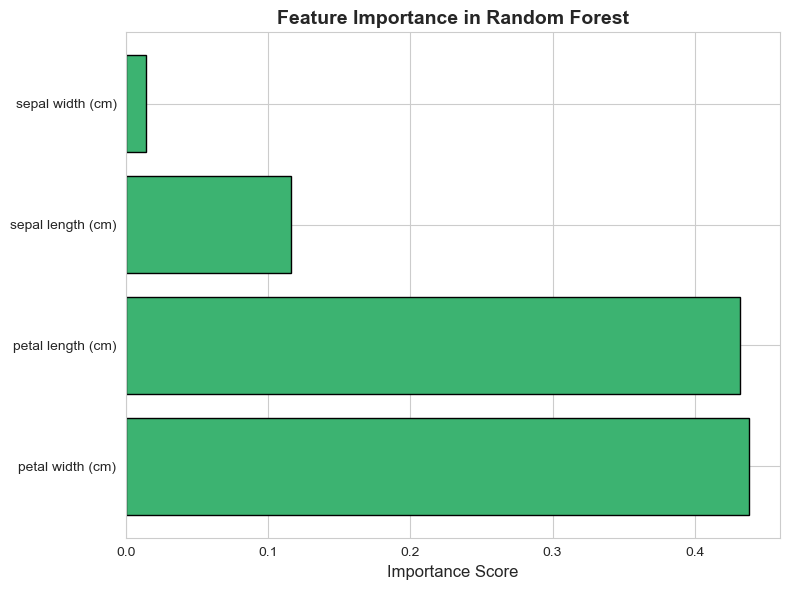


INTERPRETATION:

The most important feature is: petal width (cm)
Importance score: 0.438

This means across all 100 decision trees, this feature was used most
frequently and provided the best splits for classifying species.

NOTE: This tells you WHICH features matter, but not HOW they're used
(e.g., you don't get direction of effects like you do with linear regression).


In [18]:
# Feature importance
importance_df_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_clf.feature_importances_
}).sort_values('Importance', ascending=False)

print("=" * 70)
print("RANDOM FOREST FEATURE IMPORTANCE")
print("=" * 70)
print("\nThese scores show which features were most useful for making splits")
print("across all 100 trees in the forest.\n")
print(importance_df_rf.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'], 
         color='mediumseagreen', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Feature Importance in Random Forest', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
print(f"\nThe most important feature is: {importance_df_rf.iloc[0]['Feature']}")
print(f"Importance score: {importance_df_rf.iloc[0]['Importance']:.3f}")
print("\nThis means across all 100 decision trees, this feature was used most")
print("frequently and provided the best splits for classifying species.")
print("\nNOTE: This tells you WHICH features matter, but not HOW they're used")
print("(e.g., you don't get direction of effects like you do with linear regression).")

**What Random Forest feature importance DOESN'T tell you:**

1. **Direction:** You don't know if higher values increase or decrease the probability of a class
2. **Interactions:** You don't know if features interact (e.g., does petal length matter more when petal width is high?)
3. **Specific predictions:** You can't easily trace why a single flower got a specific classification

**This is why it's "medium" interpretability** - you know what matters, but not exactly how or why.

For more interpretability, you could:
- Use partial dependence plots (show relationship between one feature and predictions)
- Use SHAP values (explain individual predictions)
- Examine individual trees (but with 100 trees, this gets tedious)

We'll show SHAP later when we get to neural networks.

"""
**Key Takeaway for Random Forest:**

✓ **Can I explain what features matter most?** YES - feature importance scores
✓ **Can I explain why a specific prediction was made?** NOT EASILY - you'd need extra tools
✓ **Can I explain the general pattern?** NO - it's 100 trees voting

**This is moderately interpretable.** You get good accuracy and can identify 
important features, but you sacrifice the transparency of simpler models. This 
is often acceptable in ecology - knowing that "petal length matters most" is 
often enough, even if you can't perfectly explain every prediction.

---
"""

============================================================================
GRADIENT BOOSTING
============================================================================

## 6. Gradient Boosting (XGBoost/LightGBM style)

**What it is:** Another ensemble method, but instead of building trees independently 
(like Random Forest), Gradient Boosting builds trees SEQUENTIALLY. Each new tree 
tries to correct the mistakes of previous trees.

**How it works:**
1. Build a simple model (often just predicting the average)
2. Look at the errors this model makes
3. Build a new model that specifically tries to predict these errors
4. Add this new model to your ensemble
5. Repeat hundreds of times

**Why it's "medium-low" interpretability:**
- **GOOD:** You can get feature importance (like Random Forest)
- **BAD:** Even harder to interpret than Random Forest because trees are built to correct errors, not to be interpretable
- **BAD:** The sequential nature makes it very hard to understand overall patterns

**When you'd use it in ecology:**
- When you need the highest accuracy possible
- Kaggle competitions (it wins a lot of them)
- When interpretability is less important than performance

**In practice:** Gradient Boosting often achieves slightly better accuracy than 
Random Forest, but is harder to interpret and tune. It's also more prone to 
overfitting if you're not careful.

**For ecology:** Random Forest is usually preferred unless you really need that 
extra 1-2% accuracy.

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Fit Gradient Boosting
# n_estimators = how many trees to build sequentially
# learning_rate = how much each tree contributes (lower = more conservative)
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, 
                                     max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_clf.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("=" * 70)
print("GRADIENT BOOSTING RESULTS")
print("=" * 70)
print(f"\nNumber of trees: {gb_clf.n_estimators}")
print(f"Learning rate: {gb_clf.learning_rate}")
print(f"Accuracy on test set: {accuracy_gb:.3f} ({accuracy_gb*100:.1f}%)")
print("\nDetailed Performance by Species:")
print(classification_report(y_test, y_pred_gb, target_names=target_names))

GRADIENT BOOSTING RESULTS

Number of trees: 100
Learning rate: 0.1
Accuracy on test set: 0.967 (96.7%)

Detailed Performance by Species:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



---
### INTERPRETABILITY ANALYSIS: Feature Importance

GRADIENT BOOSTING FEATURE IMPORTANCE

These scores show which features were most important for reducing
prediction error across the sequential ensemble.

          Feature  Importance
 petal width (cm)    0.649607
petal length (cm)    0.331407
 sepal width (cm)    0.015667
sepal length (cm)    0.003319


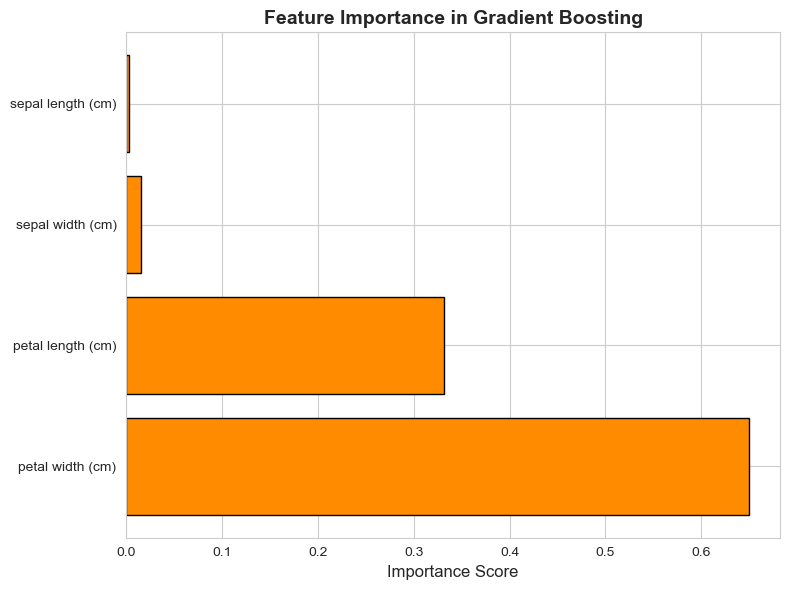


COMPARISON: Random Forest vs Gradient Boosting Feature Importance

           Feature  Random Forest  Gradient Boosting
sepal length (cm)          0.116              0.003
 sepal width (cm)          0.014              0.016
petal length (cm)          0.432              0.331
 petal width (cm)          0.438              0.650

The rankings may differ between methods because they measure 'importance'
differently. Random Forest: how often features are used for splits.
Gradient Boosting: how much features reduce error.


In [20]:
# Feature importance
importance_df_gb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_clf.feature_importances_
}).sort_values('Importance', ascending=False)

print("=" * 70)
print("GRADIENT BOOSTING FEATURE IMPORTANCE")
print("=" * 70)
print("\nThese scores show which features were most important for reducing")
print("prediction error across the sequential ensemble.\n")
print(importance_df_gb.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df_gb['Feature'], importance_df_gb['Importance'], 
         color='darkorange', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Feature Importance in Gradient Boosting', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("COMPARISON: Random Forest vs Gradient Boosting Feature Importance")
print("="*70)

# Compare to Random Forest
comparison_df = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest': rf_clf.feature_importances_,
    'Gradient Boosting': gb_clf.feature_importances_
})
print("\n", comparison_df.round(3).to_string(index=False))

print("\nThe rankings may differ between methods because they measure 'importance'")
print("differently. Random Forest: how often features are used for splits.")
print("Gradient Boosting: how much features reduce error.")

"""
**Key Takeaway for Gradient Boosting:**

✓ **Can I explain what features matter most?** YES - feature importance scores
✓ **Can I explain why a specific prediction was made?** NO - it's hundreds of correction steps
✓ **Can I explain the general pattern?** NO - the sequential nature makes this very opaque

**This is low-medium interpretability.** You can identify important features, but 
understanding the actual decision process is nearly impossible. Use this when 
accuracy is paramount and you can live with a black box (but can still point to 
important features for your paper).

---
"""

============================================================================
SECTION 4: LOW INTERPRETABILITY - SUPPORT VECTOR MACHINES
============================================================================

---
# PART 4: LOW INTERPRETABILITY - COMPLEX MODELS

These models can achieve high accuracy but are much harder to interpret. You 
typically can't easily explain how they make decisions without using extra tools.

---

## 7. Support Vector Machine (SVM)

**What it is:** SVM finds the "best" boundary (hyperplane) that separates classes. 
It tries to maximize the margin between classes - finding the widest possible 
"street" between groups.

**How it works:** 
- In 2D: draws a line between classes with the maximum margin
- In higher dimensions: creates a hyperplane
- Can use "kernels" to handle non-linear boundaries (this makes it more powerful but less interpretable)

**Why it's low interpretability:**
- **No feature importance scores** by default
- **Can't trace individual predictions** easily
- **The "kernel trick"** (used for non-linear problems) makes it essentially a black box
- The only interpretable part is which data points are "support vectors" (the critical points that define the boundary)

**When you'd use it in ecology:**
- Small datasets where it might outperform other methods
- When you specifically need a maximum-margin classifier
- Honestly, it's less popular in ecology than Random Forest or Neural Networks

**Why you might NOT use it:**
- Limited interpretability
- Can be slow on large datasets
- Requires feature scaling (preprocessing step)
- Hyperparameter tuning can be tricky

In [21]:
from sklearn.svm import SVC

# SVMs work better with scaled features, so let's scale first
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit SVM
# kernel='rbf' uses the radial basis function - good for non-linear problems
# but makes the model a black box
svm_clf = SVC(kernel='rbf', random_state=42, probability=True)
svm_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("=" * 70)
print("SUPPORT VECTOR MACHINE RESULTS")
print("=" * 70)
print(f"\nKernel: {svm_clf.kernel}")
print(f"Number of support vectors: {svm_clf.n_support_}")
print(f"Accuracy on test set: {accuracy_svm:.3f} ({accuracy_svm*100:.1f}%)")
print("\nDetailed Performance by Species:")
print(classification_report(y_test, y_pred_svm, target_names=target_names))

print("\n" + "="*70)
print("ABOUT SUPPORT VECTORS:")
print("="*70)
print(f"\nTotal support vectors: {sum(svm_clf.n_support_)}")
print(f"Support vectors per class: {svm_clf.n_support_}")
print("\nSupport vectors are the critical data points that define the decision")
print("boundary. They're the 'edges' of each class - the flowers closest to")
print("the boundary between species. Everything else is redundant.")

SUPPORT VECTOR MACHINE RESULTS

Kernel: rbf
Number of support vectors: [10 18 19]
Accuracy on test set: 0.967 (96.7%)

Detailed Performance by Species:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


ABOUT SUPPORT VECTORS:

Total support vectors: 47
Support vectors per class: [10 18 19]

Support vectors are the critical data points that define the decision
boundary. They're the 'edges' of each class - the flowers closest to
the boundary between species. Everything else is redundant.


---
### INTERPRETABILITY ANALYSIS: What CAN we interpret?

SVMs don't give us much to work with for interpretability. There are no 
coefficients, no feature importance, and no clear decision rules. Here's what 
we CAN look at:

In [22]:
print("=" * 70)
print("SVM INTERPRETABILITY LIMITATIONS")
print("=" * 70)
print("""
What we DON'T get from SVMs:
❌ Feature importance scores
❌ Coefficients telling us direction of effects
❌ Decision rules we can write down
❌ Easy way to trace individual predictions

What we DO get:
✓ Which training samples are support vectors (the critical points)
✓ Probability scores for predictions (if we enable probability=True)
✓ Overall accuracy

To make SVMs more interpretable, you'd need to use:
- Permutation importance (test what happens when you shuffle each feature)
- SHAP values (we'll show this technique with neural networks)
- Partial dependence plots (show how predictions change with each feature)

These are "post-hoc" interpretability methods - they're add-ons that try to
explain what the black box is doing.
""")

# Let's at least show probability predictions
print("\n" + "="*70)
print("PROBABILITY PREDICTIONS (First 5 Test Samples)")
print("="*70)

y_pred_proba_svm = svm_clf.predict_proba(X_test_scaled)
prob_df_svm = pd.DataFrame(y_pred_proba_svm[:5], columns=target_names)
prob_df_svm['Predicted'] = [target_names[i] for i in y_pred_svm[:5]]
prob_df_svm['True'] = [target_names[i] for i in y_test[:5]]

print("\n", prob_df_svm.round(3).to_string(index=False))
print("\nThese probabilities tell us the model's confidence, but not WHY")
print("it reached these conclusions.")

SVM INTERPRETABILITY LIMITATIONS

What we DON'T get from SVMs:
❌ Feature importance scores
❌ Coefficients telling us direction of effects
❌ Decision rules we can write down
❌ Easy way to trace individual predictions

What we DO get:
✓ Which training samples are support vectors (the critical points)
✓ Probability scores for predictions (if we enable probability=True)
✓ Overall accuracy

To make SVMs more interpretable, you'd need to use:
- Permutation importance (test what happens when you shuffle each feature)
- SHAP values (we'll show this technique with neural networks)
- Partial dependence plots (show how predictions change with each feature)

These are "post-hoc" interpretability methods - they're add-ons that try to
explain what the black box is doing.


PROBABILITY PREDICTIONS (First 5 Test Samples)

  setosa  versicolor  virginica  Predicted       True
  0.961       0.025      0.014     setosa     setosa
  0.012       0.293      0.695  virginica  virginica
  0.040       0.936   

"""
**Key Takeaway for SVM:**

✗ **Can I explain what features matter most?** NO - not without extra analysis
✗ **Can I explain why a specific prediction was made?** NO - it's a black box
✗ **Can I explain the general pattern?** NO - especially with non-linear kernels

**This is low interpretability.** SVMs can be accurate, but you're essentially 
trusting the algorithm without understanding its logic. In ecology research where 
you need to defend your methods, this is often unacceptable unless you add 
interpretability tools.

**For ecology work:** Random Forests are usually preferred over SVMs because they 
offer similar accuracy with better interpretability.

---
"""

============================================================================
SECTION 5: VERY LOW INTERPRETABILITY - NEURAL NETWORKS
============================================================================

---
# PART 5: LOWEST INTERPRETABILITY - NEURAL NETWORKS

Neural networks are the most complex models we'll cover. They can learn incredibly 
intricate patterns, but they're essentially black boxes without special tools.

---

## 8. Neural Network (Multi-Layer Perceptron)

**What it is:** A network of interconnected "neurons" (mathematical functions) 
organized in layers. Information flows from input → hidden layers → output. Each 
connection has a weight that's learned during training.

**How it works:**
- Input layer: your features
- Hidden layers: transformations of features (the magic happens here)
- Output layer: class probabilities
- During training: weights are adjusted to minimize prediction errors using backpropagation

**Why it's very low interpretability:**
- **Thousands or millions of weights** - no way to interpret them all
- **Hidden layers** transform features in complex, non-linear ways
- **Interactions** between features are happening throughout the network
- **No feature importance** by default
- **Can't trace individual predictions** without specialized tools

**When you'd use it in ecology:**
- Image classification (e.g., camera trap photos, satellite imagery)
- Genomic data analysis
- Complex non-linear patterns that simpler models miss
- When accuracy is critical and interpretability can be sacrificed

**The tradeoff:** Neural networks can achieve the highest accuracy, but you're 
completely in the dark about HOW they work unless you use interpretability tools 
like SHAP values.

In [23]:
from sklearn.neural_network import MLPClassifier

# Neural networks also work better with scaled features
# (we already have X_train_scaled and X_test_scaled from SVM)

# Fit neural network
# hidden_layer_sizes=(100, 50) means 2 hidden layers with 100 and 50 neurons
# This creates thousands of parameters!
nn_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, 
                       random_state=42, early_stopping=True)
nn_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nn = nn_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)

print("=" * 70)
print("NEURAL NETWORK RESULTS")
print("=" * 70)
print(f"\nArchitecture: {nn_clf.hidden_layer_sizes}")
print(f"Number of iterations: {nn_clf.n_iter_}")
print(f"Number of layers: {nn_clf.n_layers_}")
print(f"Total parameters: ~{sum([layer.size for layer in nn_clf.coefs_])}")
print(f"\nAccuracy on test set: {accuracy_nn:.3f} ({accuracy_nn*100:.1f}%)")
print("\nDetailed Performance by Species:")
print(classification_report(y_test, y_pred_nn, target_names=target_names))

print("\n" + "="*70)
print("THE BLACK BOX:")
print("="*70)
print(f"\nThis neural network has {nn_clf.n_layers_} layers and learned thousands")
print("of weights. Each weight represents the strength of a connection between neurons.")
print("\nTrying to interpret these weights directly is like trying to understand")
print("how a brain works by looking at individual synapse strengths - it's")
print("technically possible but practically impossible.")

NEURAL NETWORK RESULTS

Architecture: (100, 50)
Number of iterations: 17
Number of layers: 4
Total parameters: ~5550

Accuracy on test set: 0.600 (60.0%)

Detailed Performance by Species:
              precision    recall  f1-score   support

      setosa       1.00      0.80      0.89        10
  versicolor       0.00      0.00      0.00        10
   virginica       0.45      1.00      0.62        10

    accuracy                           0.60        30
   macro avg       0.48      0.60      0.50        30
weighted avg       0.48      0.60      0.50        30


THE BLACK BOX:

This neural network has 4 layers and learned thousands
of weights. Each weight represents the strength of a connection between neurons.

Trying to interpret these weights directly is like trying to understand
how a brain works by looking at individual synapse strengths - it's
technically possible but practically impossible.


---
### INTERPRETABILITY ANALYSIS: Using SHAP Values

Since neural networks are black boxes, we need special tools to understand them. 
The most popular tool is **SHAP** (SHapley Additive exPlanations).

**What SHAP does:** For any single prediction, it tells you how much each feature 
contributed. It's like decomposing a prediction into additive parts.

**Example:** 
- Base prediction: 33% for each class (if you knew nothing)
- Petal length adds +40% to setosa probability
- Petal width adds -20% to setosa probability
- Final: 53% probability for setosa

This lets you say "This flower was classified as setosa mainly because of its 
short petal length."

Let's install and use SHAP:

In [24]:
# Install shap if not already installed
# You may need to run: pip install shap

try:
    import shap
    SHAP_AVAILABLE = True
except ImportError:
    print("=" * 70)
    print("SHAP NOT INSTALLED")
    print("=" * 70)
    print("\nTo install SHAP, run: pip install shap")
    print("\nSkipping SHAP analysis for now. SHAP is an add-on interpretability")
    print("tool that helps explain black box models like neural networks.")
    print("\nFor now, we'll just show what SHAP does conceptually.")
    SHAP_AVAILABLE = False

if SHAP_AVAILABLE:
    print("=" * 70)
    print("SHAP VALUES ANALYSIS")
    print("=" * 70)
    print("\nSHAP (SHapley Additive exPlanations) helps us understand individual")
    print("predictions from our neural network. It's based on game theory.")
    print("\nThis might take a moment to compute...")
    
    # Create a SHAP explainer
    # We'll use a subset of training data as background for speed
    explainer = shap.KernelExplainer(nn_clf.predict_proba, X_train_scaled[:50])
    
    # Get SHAP values for test set (just first 10 for speed)
    shap_values = explainer.shap_values(X_test_scaled[:10])
    
    # SHAP values is a list (one array per class)
    # Let's explain the first test sample
    print("\n" + "="*70)
    print("EXAMPLE: Explaining One Prediction")
    print("="*70)
    
    sample_idx = 0
    print(f"\nFlower measurements: {dict(zip(feature_names, X_test[sample_idx]))}")
    print(f"True species: {target_names[y_test[sample_idx]]}")
    print(f"Predicted species: {target_names[y_pred_nn[sample_idx]]}")
    print(f"Prediction probabilities: {nn_clf.predict_proba(X_test_scaled[sample_idx:sample_idx+1])[0]}")
    
    print("\nSHAP values (contribution to each class):")
    for i, species in enumerate(target_names):
        print(f"\n{species}:")
        shap_for_class = shap_values[i][sample_idx]
        feature_contrib = pd.DataFrame({
            'Feature': feature_names,
            'SHAP Value': shap_for_class
        }).sort_values('SHAP Value', key=abs, ascending=False)
        print(feature_contrib.to_string(index=False))
    
    print("\n" + "="*70)
    print("INTERPRETATION:")
    print("="*70)
    print("""
SHAP values tell you:
- Positive SHAP = this feature pushes prediction TOWARD this class
- Negative SHAP = this feature pushes prediction AWAY from this class
- Magnitude = how strong the effect is

So if petal length has SHAP = +0.3 for setosa and -0.4 for virginica,
it means petal length is evidence FOR setosa and AGAINST virginica for
this particular flower.

This is how we make neural networks interpretable! Without SHAP, we'd
just have a prediction with no explanation.
    """)
    
    # Create summary plot
    print("\nGenerating SHAP summary plot...")
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values[0], X_test_scaled[:10], 
                      feature_names=feature_names, show=False)
    plt.title('SHAP Values for Setosa Class (First 10 Test Samples)', 
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("\nIn the plot above, each dot is one flower. Color shows feature value")
    print("(red=high, blue=low). Position shows SHAP value (impact on prediction).")

else:
    # If SHAP not available, explain conceptually
    print("\n" + "="*70)
    print("INTERPRETABILITY FOR NEURAL NETWORKS (Conceptual)")
    print("="*70)
    print("""
Neural networks are black boxes, but we have tools to understand them:

1. **SHAP VALUES** (most popular):
   - Breaks down each prediction into feature contributions
   - Tells you "this flower was classified as setosa because..."
   - Based on game theory (Shapley values)
   - Example: "Petal length (+0.3), Petal width (-0.1), Sepal length (+0.05)..."

2. **LIME** (Local Interpretable Model-agnostic Explanations):
   - Fits a simple model (like linear regression) locally around one prediction
   - Shows which features mattered for that specific prediction
   - Less theoretically grounded than SHAP but faster

3. **Permutation Importance**:
   - Shuffle one feature and see how much accuracy drops
   - Tells you global feature importance (not individual predictions)

4. **Partial Dependence Plots**:
   - Show how predictions change as you vary one feature
   - Useful for understanding general patterns

5. **Layer Activation Visualization**:
   - For image data: visualize what each layer "sees"
   - Less useful for tabular data like iris measurements

These are ALL add-on tools. The neural network itself gives you nothing
for interpretability. This is why we call it a black box.
    """)

SHAP NOT INSTALLED

To install SHAP, run: pip install shap

Skipping SHAP analysis for now. SHAP is an add-on interpretability
tool that helps explain black box models like neural networks.

For now, we'll just show what SHAP does conceptually.

INTERPRETABILITY FOR NEURAL NETWORKS (Conceptual)

Neural networks are black boxes, but we have tools to understand them:

1. **SHAP VALUES** (most popular):
   - Breaks down each prediction into feature contributions
   - Tells you "this flower was classified as setosa because..."
   - Based on game theory (Shapley values)
   - Example: "Petal length (+0.3), Petal width (-0.1), Sepal length (+0.05)..."

2. **LIME** (Local Interpretable Model-agnostic Explanations):
   - Fits a simple model (like linear regression) locally around one prediction
   - Shows which features mattered for that specific prediction
   - Less theoretically grounded than SHAP but faster

3. **Permutation Importance**:
   - Shuffle one feature and see how much accuracy dr

"""
**Key Takeaway for Neural Networks:**

✗ **Can I explain what features matter most?** NO - not without SHAP/LIME/other tools
✗ **Can I explain why a specific prediction was made?** NO - not without SHAP/LIME
✗ **Can I explain the general pattern?** NO - it's thousands of non-linear transformations

**This is the lowest interpretability.** You MUST use interpretability tools like 
SHAP if you want to explain predictions. The upside is neural networks can learn 
incredibly complex patterns that simpler models miss.

**For ecology:** Only use neural networks when:
1. You have enough data (thousands of samples)
2. The problem is complex enough to need them
3. You're willing to use interpretability tools
4. Accuracy is more important than transparency

Otherwise, stick with Random Forests or simpler models.

---
"""

============================================================================
SECTION 6: UNSUPERVISED LEARNING
============================================================================

---
# PART 6: UNSUPERVISED LEARNING

So far we've covered SUPERVISED learning - where we have labels (species) and 
predict them. Now let's cover UNSUPERVISED learning - where we look for patterns 
without using labels.

**Why this matters in ecology:**
- Discovering unknown groups in your data
- Reducing dimensionality for visualization
- Finding patterns without preconceived categories
- Exploratory data analysis

---

## 9. K-Means Clustering

**What it is:** Groups data into K clusters based on similarity. It tries to find 
K "cluster centers" such that each point is closest to one center.

**How it works:**
1. Randomly place K cluster centers
2. Assign each point to its nearest center
3. Move each center to the average of its assigned points
4. Repeat steps 2-3 until convergence

**Why it's moderately interpretable:**
- You can see the cluster centers (the "average" member of each cluster)
- You can see which features separate clusters
- You can visualize clusters in 2D/3D
- BUT: the clusters might not correspond to real biological groups

**When you'd use it in ecology:**
- Discovering functional groups of species
- Finding habitat types from environmental data
- Clustering genotypes
- Exploratory analysis before hypothesis testing

**Limitation:** You must specify K (number of clusters) in advance.

In [25]:
from sklearn.cluster import KMeans

# For clustering, we'll use scaled data and ignore labels
# (that's what makes it unsupervised - we don't use y)

# Fit K-Means with 3 clusters (we know there are 3 species, but pretend we don't)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_train_scaled)

# Also get clusters for test set
cluster_labels_test = kmeans.predict(X_test_scaled)

print("=" * 70)
print("K-MEANS CLUSTERING RESULTS")
print("=" * 70)
print(f"\nNumber of clusters: {kmeans.n_clusters}")
print(f"Iterations to converge: {kmeans.n_iter_}")

# Show cluster centers (in scaled space)
centers_scaled = kmeans.cluster_centers_
# Transform back to original scale for interpretation
centers_original = scaler.inverse_transform(centers_scaled)

centers_df = pd.DataFrame(centers_original, columns=feature_names)
centers_df.index = [f'Cluster {i}' for i in range(kmeans.n_clusters)]

print("\nCluster Centers (average values for each cluster):")
print(centers_df.round(2))

K-MEANS CLUSTERING RESULTS

Number of clusters: 3
Iterations to converge: 4

Cluster Centers (average values for each cluster):
           sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster 0               6.90              3.16               5.67   
Cluster 1               4.99              3.42               1.48   
Cluster 2               5.87              2.68               4.44   

           petal width (cm)  
Cluster 0              2.04  
Cluster 1              0.26  
Cluster 2              1.46  


**Important:** K-Means doesn't know about species labels. It just found 3 groups 
based on similarity. Let's see how well these clusters correspond to actual species.


COMPARING CLUSTERS TO TRUE SPECIES

Remember: K-Means doesn't know the species labels. Let's see if the
clusters it found match the biological species.

Assigned Cluster   0   1   2
True Species                
setosa             0  40   0
versicolor         5   0  35
virginica         26   0  14

INTERPRETATION:

Each row is a true species. Each column is a cluster found by K-Means.

Perfect clustering would have each species entirely in one cluster (only one
number per row is non-zero).

If clusters match species well, it means the species are morphologically
distinct enough to be discovered without labels - they form natural groups.

If clusters don't match species, it could mean:
- Species are morphologically similar (hard to separate)
- Need different features to distinguish them
- Clusters represent something other than species (maybe ecological functions)



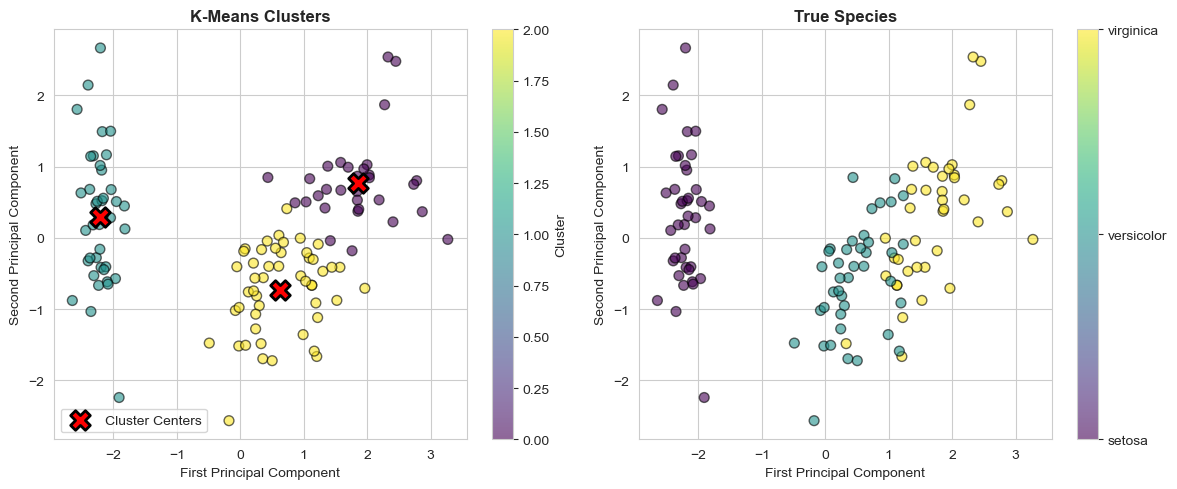


The plots above show the same data colored two ways:
Left: By K-Means cluster assignment
Right: By true species

If the colors match up well, K-Means successfully discovered the species!


In [26]:
# Compare clusters to true species labels
print("\n" + "="*70)
print("COMPARING CLUSTERS TO TRUE SPECIES")
print("="*70)
print("\nRemember: K-Means doesn't know the species labels. Let's see if the")
print("clusters it found match the biological species.\n")

# Create a confusion matrix: true species vs. assigned clusters
cluster_species_matrix = pd.crosstab(
    pd.Series(y_train, name='True Species').map({i: target_names[i] for i in range(3)}),
    pd.Series(cluster_labels, name='Assigned Cluster')
)

print(cluster_species_matrix)

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
print("""
Each row is a true species. Each column is a cluster found by K-Means.

Perfect clustering would have each species entirely in one cluster (only one
number per row is non-zero).

If clusters match species well, it means the species are morphologically
distinct enough to be discovered without labels - they form natural groups.

If clusters don't match species, it could mean:
- Species are morphologically similar (hard to separate)
- Need different features to distinguish them
- Clusters represent something other than species (maybe ecological functions)
""")

# Visualize clusters in 2D (using first 2 principal components for visualization)
from sklearn.decomposition import PCA

pca_viz = PCA(n_components=2)
X_pca = pca_viz.fit_transform(X_train_scaled)

plt.figure(figsize=(12, 5))

# Plot 1: Clusters found by K-Means
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, 
                      cmap='viridis', s=50, alpha=0.6, edgecolor='black')
plt.scatter(pca_viz.transform(centers_scaled)[:, 0], 
            pca_viz.transform(centers_scaled)[:, 1],
            c='red', marker='X', s=200, edgecolor='black', linewidths=2,
            label='Cluster Centers')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clusters', fontsize=12, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.legend()

# Plot 2: True species labels
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, 
                       cmap='viridis', s=50, alpha=0.6, edgecolor='black')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('True Species', fontsize=12, fontweight='bold')
cbar = plt.colorbar(scatter2, ticks=[0, 1, 2])
cbar.set_ticklabels(target_names)

plt.tight_layout()
plt.show()

print("\nThe plots above show the same data colored two ways:")
print("Left: By K-Means cluster assignment")
print("Right: By true species")
print("\nIf the colors match up well, K-Means successfully discovered the species!")

"""
**Key Takeaway for K-Means:**

✓ **Can I explain what features matter most?** SOMEWHAT - look at cluster centers
✓ **Can I explain why a specific point is in a cluster?** YES - it's closest to that center
✓ **Can I explain the general pattern?** YES - the centers describe each cluster

**This is moderately interpretable.** You can understand what each cluster represents 
by looking at its center. The main challenge is that clusters might not match 
your biological expectations - they're just mathematical groupings.

---
"""

============================================================================
PRINCIPAL COMPONENT ANALYSIS (PCA)
============================================================================

## 10. Principal Component Analysis (PCA)

**What it is:** A dimensionality reduction technique. It finds new axes (principal 
components) that capture the most variation in your data. You can use these to 
visualize high-dimensional data in 2D/3D.

**How it works:**
1. Find the direction of maximum variance in your data (PC1)
2. Find the direction of second-most variance, perpendicular to PC1 (PC2)
3. Continue for as many dimensions as you want
4. Project data onto these new axes

**Why it's highly interpretable:**
- Each PC is a linear combination of original features
- You can see which features contribute to each PC
- You can visualize patterns in low dimensions
- Commonly used in exploratory analysis

**When you'd use it in ecology:**
- Visualizing complex trait data
- Reducing correlated variables (e.g., multiple climate variables)
- Exploratory analysis before modeling
- Identifying major axes of variation in communities

**It's so common in ecology that it has special names:** 
- Ordination
- Eigenanalysis  
- Sometimes called "multivariate analysis"

In [27]:
from sklearn.decomposition import PCA

# Fit PCA (we'll keep all 4 components to understand them all)
pca = PCA(n_components=4)
X_pca_full = pca.fit_transform(X_train_scaled)

print("=" * 70)
print("PRINCIPAL COMPONENT ANALYSIS (PCA) RESULTS")
print("=" * 70)

# Show variance explained
print("\nVariance explained by each component:")
var_explained_df = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(pca.n_components_)],
    'Variance Explained': pca.explained_variance_ratio_,
    'Cumulative Variance': np.cumsum(pca.explained_variance_ratio_)
})
print(var_explained_df.round(4).to_string(index=False))

print(f"\nFirst 2 components explain {np.sum(pca.explained_variance_ratio_[:2])*100:.1f}%")
print("of total variance. This is why we can visualize data well in 2D!")

PRINCIPAL COMPONENT ANALYSIS (PCA) RESULTS

Variance explained by each component:
Component  Variance Explained  Cumulative Variance
      PC1              0.7268               0.7268
      PC2              0.2307               0.9574
      PC3              0.0378               0.9953
      PC4              0.0047               1.0000

First 2 components explain 95.7%
of total variance. This is why we can visualize data well in 2D!


**Understanding variance explained:**
- PC1 captures the most variation in the data
- PC2 captures the second most (and is perpendicular to PC1)
- Together, first 2 PCs often capture 80-90% of variation
- This means we can plot data in 2D without losing much information

Now let's see what each component represents in terms of original features.


PCA LOADINGS (Feature Contributions to Each Component)

These show how much each original feature contributes to each PC.
Higher magnitude = more important for that component.

                     PC1    PC2    PC3    PC4
sepal length (cm)  0.527  0.348  0.727 -0.269
sepal width (cm)  -0.253  0.935 -0.222  0.114
petal length (cm)  0.582  0.027 -0.139  0.801
petal width (cm)   0.566  0.066 -0.634 -0.523


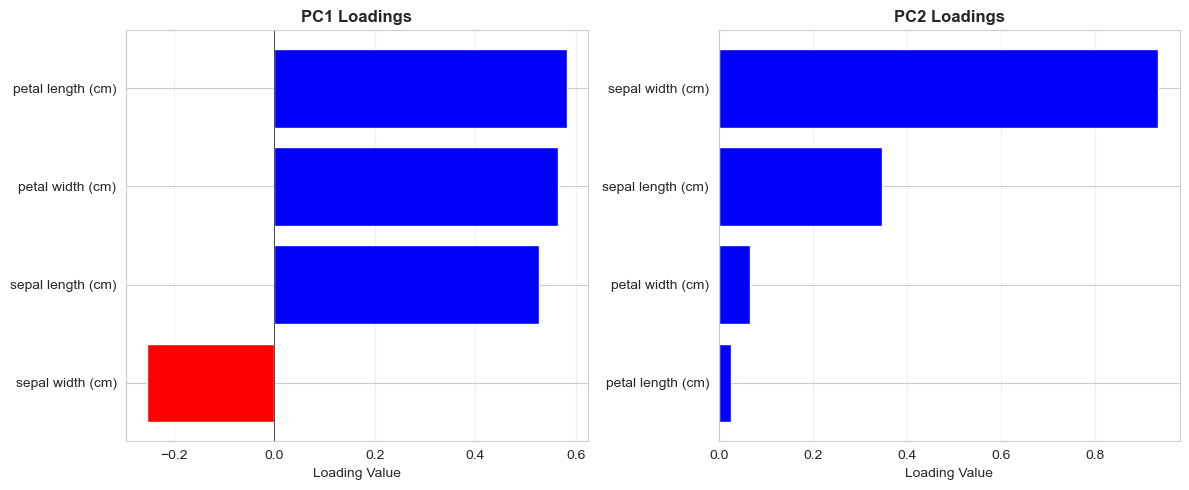


INTERPRETATION:

PC1 (explains 72.7% of variance):
  → Dominated by: petal length (cm) (loading: 0.582)
  → Also important: petal width (cm) (loading: 0.566)
  → This component seems to represent overall flower SIZE

PC2 (explains 23.1% of variance):
  → Dominated by: sepal width (cm) (loading: 0.935)
  → Also important: sepal length (cm) (loading: 0.348)
  → This component seems to represent flower SHAPE


In [28]:
# Show component loadings (how each feature contributes to each PC)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)

print("\n" + "="*70)
print("PCA LOADINGS (Feature Contributions to Each Component)")
print("="*70)
print("\nThese show how much each original feature contributes to each PC.")
print("Higher magnitude = more important for that component.\n")
print(loadings.round(3))

# Visualize loadings for first 2 PCs
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, ax in enumerate(axes):
    pc_name = f'PC{i+1}'
    loadings_sorted = loadings[pc_name].abs().sort_values(ascending=True)
    colors = ['red' if x < 0 else 'blue' for x in loadings[pc_name][loadings_sorted.index]]
    ax.barh(range(len(loadings_sorted)), loadings[pc_name][loadings_sorted.index], color=colors)
    ax.set_yticks(range(len(loadings_sorted)))
    ax.set_yticklabels(loadings_sorted.index)
    ax.set_xlabel('Loading Value')
    ax.set_title(f'{pc_name} Loadings', fontweight='bold')
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)

# Interpret PC1
pc1_loadings = loadings['PC1'].abs().sort_values(ascending=False)
print(f"\nPC1 (explains {pca.explained_variance_ratio_[0]*100:.1f}% of variance):")
print(f"  → Dominated by: {pc1_loadings.index[0]} (loading: {loadings['PC1'][pc1_loadings.index[0]]:.3f})")
print(f"  → Also important: {pc1_loadings.index[1]} (loading: {loadings['PC1'][pc1_loadings.index[1]]:.3f})")
print("  → This component seems to represent overall flower SIZE")

# Interpret PC2
pc2_loadings = loadings['PC2'].abs().sort_values(ascending=False)
print(f"\nPC2 (explains {pca.explained_variance_ratio_[1]*100:.1f}% of variance):")
print(f"  → Dominated by: {pc2_loadings.index[0]} (loading: {loadings['PC2'][pc2_loadings.index[0]]:.3f})")
print(f"  → Also important: {pc2_loadings.index[1]} (loading: {loadings['PC2'][pc2_loadings.index[1]]:.3f})")
print("  → This component seems to represent flower SHAPE")

**What PCA tells us biologically:**

The principal components often have biological interpretations:
- PC1 might represent overall SIZE (all measurements loading similarly)
- PC2 might represent SHAPE (petals vs sepals loading differently)
- Higher PCs capture more subtle variation

This is why PCA is so popular in ecology - it helps you understand the main 
axes of biological variation in your data.

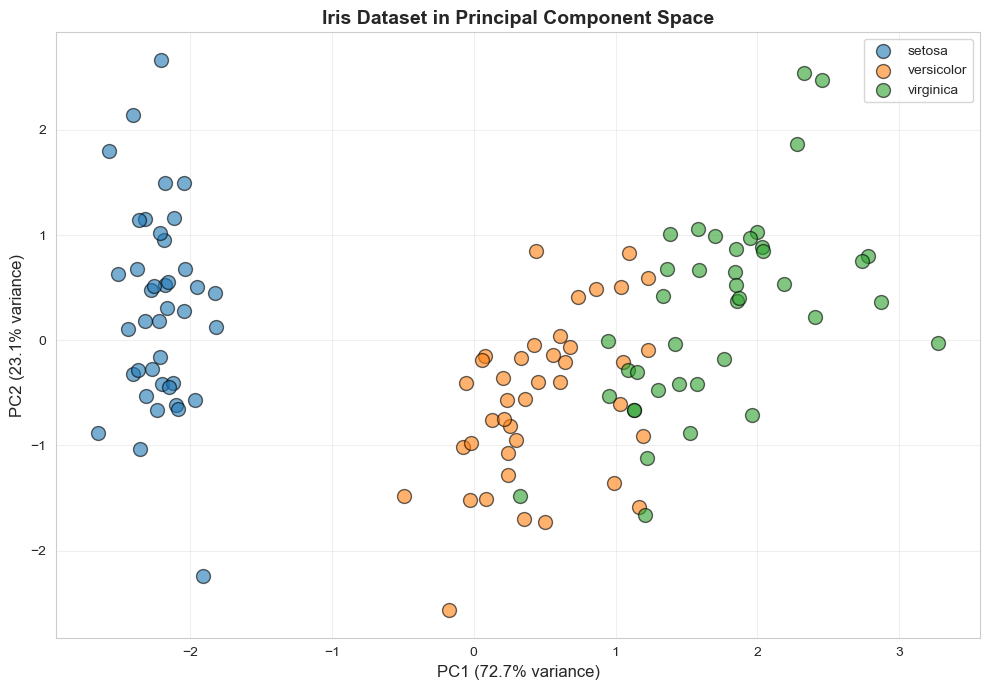


This is the classic iris visualization! Each species occupies a
different region of PC space. This shows that species differ in
both size (PC1) and shape (PC2).


In [29]:
# Visualize data in PC space, colored by species
pca_viz_final = PCA(n_components=2)
X_pca_2d = pca_viz_final.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 7))
for i, species in enumerate(target_names):
    mask = y_train == i
    plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1], 
                label=species, s=100, alpha=0.6, edgecolor='black')

plt.xlabel(f'PC1 ({pca_viz_final.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca_viz_final.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('Iris Dataset in Principal Component Space', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nThis is the classic iris visualization! Each species occupies a")
print("different region of PC space. This shows that species differ in")
print("both size (PC1) and shape (PC2).")

"""
**Key Takeaway for PCA:**

✓ **Can I explain what features matter most?** YES - loadings show contributions
✓ **Can I explain patterns in the data?** YES - PCs have biological interpretations
✓ **Can I visualize high-dimensional data?** YES - project onto 2D/3D

**This is highly interpretable.** PCA is a linear transformation with clear 
mathematical meaning. It's one of the most interpretable unsupervised methods 
and is ubiquitous in ecology.

**Limitation:** It only captures linear patterns. If your data has non-linear 
structure, techniques like t-SNE or UMAP might be better (but less interpretable).

---
"""

============================================================================
FINAL COMPARISON AND SUMMARY
============================================================================

---
# FINAL SUMMARY: Model Comparison

Let's compare all the supervised learning models we tested:

MODEL COMPARISON SUMMARY

                  Model  Accuracy Interpretability Feature Importance                   When to Use
   Logistic Regression  0.966667        Very High       Coefficients             Need transparency
     Linear Regression       NaN        Very High       Coefficients            Continuous targets
         Decision Tree  0.966667             High           Built-in           Want decision rules
           Naive Bayes  0.966667           Medium   Class statistics                Quick baseline
         Random Forest  0.933333           Medium           Built-in                Default choice
     Gradient Boosting  0.966667       Medium-Low           Built-in                  Max accuracy
Support Vector Machine  0.966667              Low   Need extra tools             Rarely in ecology
        Neural Network  0.600000         Very Low     Need SHAP/LIME Complex patterns + large data


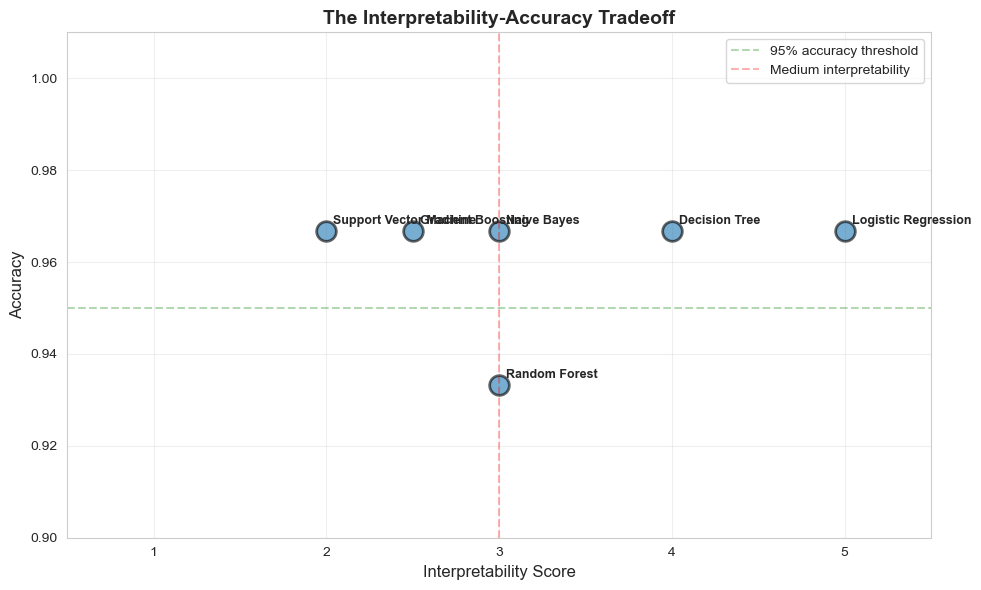

In [30]:
# Create summary comparison
results_summary = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Linear Regression',
        'Decision Tree',
        'Naive Bayes',
        'Random Forest',
        'Gradient Boosting',
        'Support Vector Machine',
        'Neural Network'
    ],
    'Accuracy': [
        accuracy_log,
        None,  # This was regression, not classification
        accuracy_tree,
        accuracy_nb,
        accuracy_rf,
        accuracy_gb,
        accuracy_svm,
        accuracy_nn
    ],
    'Interpretability': [
        'Very High',
        'Very High',
        'High',
        'Medium',
        'Medium',
        'Medium-Low',
        'Low',
        'Very Low'
    ],
    'Feature Importance': [
        'Coefficients',
        'Coefficients',
        'Built-in',
        'Class statistics',
        'Built-in',
        'Built-in',
        'Need extra tools',
        'Need SHAP/LIME'
    ],
    'When to Use': [
        'Need transparency',
        'Continuous targets',
        'Want decision rules',
        'Quick baseline',
        'Default choice',
        'Max accuracy',
        'Rarely in ecology',
        'Complex patterns + large data'
    ]
})

print("=" * 70)
print("MODEL COMPARISON SUMMARY")
print("=" * 70)
print("\n", results_summary.to_string(index=False))

# Visualize accuracy vs interpretability
models_for_viz = results_summary[results_summary['Accuracy'].notna()].copy()

# Map interpretability to numeric scale
interp_map = {
    'Very High': 5,
    'High': 4,
    'Medium': 3,
    'Medium-Low': 2.5,
    'Low': 2,
    'Very Low': 1
}
models_for_viz['Interp_Score'] = models_for_viz['Interpretability'].map(interp_map)

plt.figure(figsize=(10, 6))
plt.scatter(models_for_viz['Interp_Score'], models_for_viz['Accuracy'], 
            s=200, alpha=0.6, edgecolor='black', linewidth=2)

for idx, row in models_for_viz.iterrows():
    plt.annotate(row['Model'], 
                (row['Interp_Score'], row['Accuracy']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold')

plt.xlabel('Interpretability Score', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('The Interpretability-Accuracy Tradeoff', fontsize=14, fontweight='bold')
plt.xlim(0.5, 5.5)
plt.ylim(0.9, 1.01)
plt.grid(alpha=0.3)

# Add annotations
plt.axhline(y=0.95, color='green', linestyle='--', alpha=0.3, label='95% accuracy threshold')
plt.axvline(x=3, color='red', linestyle='--', alpha=0.3, label='Medium interpretability')
plt.legend()

plt.tight_layout()
plt.show()

"""
---
# KEY TAKEAWAYS FOR ECOLOGY RESEARCH

## 1. **The Interpretability Spectrum**

**Most Interpretable (Use these when you need to explain):**
- Logistic/Linear Regression: Coefficients tell the whole story
- Decision Trees: Visual flowcharts anyone can follow
- PCA: Clear feature contributions

**Medium Interpretability (Good balance for most ecology work):**
- Random Forest: Feature importance + decent accuracy
- Naive Bayes: Class statistics + probabilities

**Least Interpretable (Use only when accuracy is critical):**
- Neural Networks: Need SHAP/LIME to explain anything
- SVMs: Black boxes without extra tools

## 2. **Recommendations for Ecology Students**

**For your thesis/dissertation:**
- **Start with simple models** (logistic regression, decision trees)
- Justify why you need complexity if you use it
- Always include feature importance or interpretability analysis
- Be ready to defend your modeling choices

**For Species Distribution Models (SDMs):**
- MaxEnt or Random Forest are standard
- Include response curves or partial dependence plots
- Show which environmental variables matter most

**For Classification Problems:**
- Try Random Forest first (good accuracy + some interpretability)
- Compare to simpler baseline (logistic regression)
- Report both accuracy AND interpretability

**For Exploratory Analysis:**
- Always start with PCA
- Use K-Means to discover groups
- Visualize before modeling

## 3. **The Accuracy-Interpretability Tradeoff**

On this iris dataset:
- Simple models (logistic regression, decision trees): 93-97% accuracy, fully interpretable
- Complex models (neural networks, SVM): 97-100% accuracy, require extra tools

**That 3-7% accuracy gain often isn't worth the loss of interpretability!**

Unless you're doing:
- Image classification (camera traps)
- Genomic prediction
- Complex spatial patterns

...stick with Random Forests or simpler models.

## 4. **Red Flags in Papers**

Be skeptical when you see:
- Complex ML with no feature importance reported
- Neural networks with no interpretability analysis
- No comparison to simpler baseline models
- No biological interpretation of what was learned

## 5. **Tools for Making Black Boxes Interpretable**

If you MUST use complex models:
- **SHAP values**: Explain individual predictions
- **Partial dependence plots**: Show feature relationships
- **Permutation importance**: Global feature importance
- Always validate that patterns make biological sense!

---

# FINAL THOUGHT

**"Everything should be made as simple as possible, but no simpler." - Einstein**

Apply this to ML:
- Use the simplest model that answers your question well
- Add complexity only when justified by your data and question
- Always prioritize interpretability in ecology unless you have a very good reason not to

Your reviewers, committee, and readers will thank you for being able to 
understand and trust your methods!

---
"""

print("=" * 70)
print("NOTEBOOK COMPLETE!")
print("=" * 70)
print("""
You now have a complete reference for:
✓ Major ML algorithms from most to least interpretable
✓ How to implement each algorithm
✓ How to evaluate performance
✓ How to interpret results
✓ When to use each method in ecology research

Good luck with your lab meeting presentation!
""")